
<img src='https://www.nstda.or.th/th/images/News-PR/sciupdate/2020/2020-04/20200402/Covid-19-1.jpg' />

# ${\color{Blue}{ชื่อหัวข้อ \ (Project \ Topic):  }}$  Covid-19

link https://www.kaggle.com/imdevskp/corona-virus-report

https://www.kaggle.com/unanimad/corona-virus-brazil?select=brazil_population_2019.csv


## ชื่อทีม (Team name) :  ปังปุริเย่

### สมาชิก (Members) : 


1.   *คุณ Angie*
2.   *คุณ Chernkwan*
3.   *คุณ Trongjiadee*
4.   *คุณ N.Kanjanasiri*
5.   *คุณเป้*
6.   *คุณ Nine O (โอ)*



## ${\color{blue}{ แรงบรรดาลใจในการเลือกหัวข้อนี้ \ (Motivation): }}$


1. โควิด-19 กำลังแพร่ระบาดในหลาย ๆ ประเทศ
2. เป็นสิ่งที่ทุกประเทศทั่วโลกพบเจอ


#${\color{purple}{คำถามที่น่าสนใจเกี่ยวกับปัญหา \ (Interested \ Questions) :}}$ 

ลิตส์ของคำถามที่ผู้เข้าอบรมร่วมกันอภิปรายแล้วให้ความสนใจ และต้องการหาคำตอบโดยอาศัยกระบวนการ Data Engineering and Data Science 

---

1.   ทวีปที่มีจำนวนผู้ติดเชื้อมากที่สุด
2. ประเทศที่มีจำนวนผู้ติดเชื้อมากที่สุดและน้อยที่สุด
2.   ประเทศที่มีอัตราผู้ที่รักษาหายต่อจำนวนผู้ป่วย, อัตราผู้ที่เสียชีวิตต่อจำนวนผู้ป่วย มากที่สุดและน้อยที่สุด 
3.  ในประเทศอเมริกา ในรัฐใดมีอัตราผู้ติดเชื้อและอัตราผู้เสียชีวิตมากที่สุดและน้อยที่สุด
4. Prediction ทำนายจำนวนผู้เสียชีวิต จาก จำนวนผู้ติดเชื้อ


---




# ${\color{purple}{ข้อมูลที่เกี่ยวข้องในการใช้ตอบคำถามที่สนใจ}}$ ${\color{purple}{\ What \ are \ the \ Data \ related \ to \ answer \ the  \ questions? :}}$ 


* country	
* countryInfo	
* cases		
* deaths	



# (OPTION 1) ${\color{pink}{ข้อมูลที่จะนำมาวิเคราะห์ \ (Dataset): }}$

 

## ${\color{pink}{คำอธิบายเกี่ยวกับข้อมูล โดยคร่าว:}}$
  
  

1. ข้อมูลแบบ API : https://disease.sh/v3/covid-19/countries?yesterday=false&twoDaysAgo=false&sort=cases&allowNull=false เป็นข้อมูล covid-19 แบบ real time ของแต่ละประเทศ


* https://corona.lmao.ninja/docs/



2.  ข้อมูลจาก Kaggle ซึ่งเป็นข้อมูล covid-19 ในประเทศสหรัฐอเมริกา  https://www.kaggle.com/sudalairajkumar/covid19-in-usa

## ${\color{pink}{แหล่งที่มาของข้อมูล:}}$


# ${\color{darkGrey}{Exploratory \ Data \  Analysis :}}$


## ${\color{Grey}{1) \ Data \ acquisition \ process :}}$

*   แทนข้อความนี้ด้วยไอเดีย หรือกระบวนการในการได้มาซึ่งข้อมูล 






**1. จัดเก็บข้อมูล**

1.1 จัดเก็บข้อมูลจาก เว็บไซต์ Worldometer โดยใช้ API จาก https://corona.lmao.ninja/docs/
เป็นเว็บไซต์ที่เราสามารถเลือก feature ต่าง ๆ และสร้าง web api ได้


In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

In [ ]:
url = 'https://disease.sh/v3/covid-19/countries?yesterday=false&twoDaysAgo=false&sort=cases&allowNull=false'
result = requests.get(url)
r = result.json()
print(type(r))
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
result = requests.get(url, headers=headers)

<class 'list'>


In [ ]:
# สร้างเป็น DataFrame
worldOMeter = pd.DataFrame(r)
worldOMeter.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1600491297234,USA,"{'_id': 840, 'iso2': 'US', 'iso3': 'USA', 'lat...",6925941,0,203171,0,4191894,0,2530876,14179,20897,613.0,96223461,290332,331425744,North America,48,1631,3,7636.33,12648.06,42.78
1,1600491297235,India,"{'_id': 356, 'iso2': 'IN', 'iso3': 'IND', 'lat...",5308014,2539,85625,0,4208431,3230,1013958,8944,3838,62.0,62454254,45161,1382937730,Asia,261,16151,22,733.19,3043.11,6.47
2,1600491297302,Brazil,"{'_id': 76, 'iso2': 'BR', 'iso3': 'BRA', 'lat'...",4497434,0,135857,0,3789139,0,572438,8318,21126,638.0,14617980,68665,212887938,South America,47,1567,15,2688.92,17798.75,39.07
3,1600491297303,Russia,"{'_id': 643, 'iso2': 'RU', 'iso3': 'RUS', 'lat...",1091186,0,19195,0,901207,0,170784,2300,7477,132.0,42000000,287773,145948250,Europe,134,7603,3,1170.17,6174.84,15.76
4,1600491297305,Peru,"{'_id': 604, 'iso2': 'PE', 'iso3': 'PER', 'lat...",756412,0,31283,0,600795,0,124334,1449,22873,946.0,3640863,110095,33070295,South America,44,1057,9,3759.69,18167.21,43.82


1.2 จัดเก็บข้อมูล จาก Kaggle โดยการ import จาก drive
* USA : https://drive.google.com/file/d/1R8htmz1473z-1p3ykusP23y1WcL111G6/view?usp=sharing

- date - date of observation
- state - US state 2 digit code
- positive - number of tests with positive results
- negative - number of tests with negative results
- pending - number of test with pending results
- death - number of deaths
- total - total number of tests

REF : 
- USA : https://www.kaggle.com/sudalairajkumar/covid19-in-usa


In [ ]:
# Download files from Google Drive
!gdown --id 1R8htmz1473z-1p3ykusP23y1WcL111G6

Downloading...
From: https://drive.google.com/uc?id=1R8htmz1473z-1p3ykusP23y1WcL111G6
To: /content/USA_covid.zip
6.43MB [00:00, 56.5MB/s]


In [ ]:
# unzip files
!unzip /content/USA_covid.zip

Archive:  /content/USA_covid.zip
replace us_counties_covid19_daily.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: us_counties_covid19_daily.csv  
  inflating: us_covid19_daily.csv    
  inflating: us_states_covid19_daily.csv  


**read csv files**

In [ ]:
# USA
usa_counties = pd.read_csv('/content/us_counties_covid19_daily.csv')
usa_states_daily = pd.read_csv('/content/us_states_covid19_daily.csv')

In [ ]:
usa_counties['date'][0]

'2020-01-21'

In [ ]:
usa_counties['date'].tail()

528001    2020-09-12
528002    2020-09-12
528003    2020-09-12
528004    2020-09-12
528005    2020-09-12
Name: date, dtype: object

**Meta Data (usa_states_daily)**

* date : วันที่
* states : รหัสรัฐ
* positive : ผลตรวจเป็นบวก (พบเชื้อ)
* nagative : ผลตรวจเป็นลบ (ไม่พบเชื้อ)
* pending : อยู่ระหว่างตรวจสอบ
* hospitalizedCurrently : กำลัง
รักษาตัวในโรงพยาบาล
* hospitalizedCumulative : 
จำนวนผู้ป่วยสะสมสะสมในโรงพยาบาล
* inIcu : จำนวนผู้ป่วยที่กำลังอยู่ใน ICU
* inIcuCumulative : จำนวนผู้ป่วยสะสมที่อยู่ใน ICU
* onVentilatorCurrently : จำนวนผู้ป่วยที่กำลังใช้เครื่องช่วยหายใจ
* onVentilatorCumulative : จำนวนผู้ป่วยสะสมที่ใช้เครื่องช่วยหายใจ
* recovered : จำนวนผู้ที่รักษาหายแล้วทั้งหมด
* dateChecked : วันที่ตรวจสอบ
* death : จำนวนผู้เสียชีวิตทั้งหมด
* hospitalized : จำนวนผู้ป่วยสะสมสะสมในโรงพยาบาล
* lastModified : วันเวลาที่แก้ไขล่าสุด
* total : จำนวนผู้ดิดเชื้อทั้งหมด
* totalTestResults : จำนวนผู้ตรวจเชื้อทั้งหมด
* posNeg : จำนวนผู้ตรวจเชื้อทั้งหมด
* deathIncrease : จำนวนผู้ที่เสียชีวิตในวันนี้
* hospitalizedIncrease : จำนวนผู้ป่วยที่เข้ารักการรักษาใน รพ. ในวันนี้
* negativeIncrease : จำนวนผลตรวจที่เป็นลบสะสม
* negativeIncrease : จำนวนผลตรวจที่เป็นบวกสะสม
* totalTestResultsIncrease : จำนวนผลตรวจสะสม

In [ ]:
usa_states_daily.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsSource,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200912,AK,7131.0,392498.0,NaN,32.0,NaN,NaN,NaN,8.0,NaN,2377.0,A,9/12/2020 03:59,2020-09-12T03:59:00Z,09/11 23:59,44.0,NaN,2020-09-12T03:59:00Z,399629.0,6428.0,392921.0,7131.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,107,4936,399629,posNeg,399629.0,5043,399629,1,0,6ed96581d6f283512d613fd9d8effc30816ecb45,0,0,0,0,0,NaN
1,20200912,AL,137646.0,878723.0,NaN,793.0,15527.0,NaN,1608.0,NaN,891.0,54223.0,B,9/12/2020 11:00,2020-09-12T11:00:00Z,09/12 07:00,2350.0,15527.0,2020-09-12T11:00:00Z,1003546.0,NaN,NaN,124823.0,2217.0,133.0,NaN,NaN,NaN,NaN,NaN,55442.0,NaN,NaN,NaN,NaN,NaN,NaN,1,943,4504,1016369,posNeg,1016369.0,5447,1016369,17,0,1cd15fd36fcc8ee078e9743aa31ef3556e720326,0,0,0,0,0,NaN
2,20200912,AR,69710.0,750290.0,NaN,325.0,4678.0,170.0,NaN,68.0,597.0,62622.0,A+,9/11/2020 14:35,2020-09-11T14:35:00Z,09/11 10:35,969.0,4678.0,2020-09-11T14:35:00Z,820354.0,NaN,750290.0,68542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17549.0,2709.0,5,727,20915,820000,posNeg,820000.0,21642,820000,16,0,dbb33b17658ac1e96621deb25f7dc7f29893e1d5,0,0,0,0,0,NaN
3,20200912,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,9/1/2020 00:00,2020-09-01T00:00:00Z,08/31 20:00,0.0,NaN,2020-09-01T00:00:00Z,1571.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,1571,posNeg,1571.0,0,1571,0,0,ca96fa86c9a0c4210a96c86ab92800701dce88ad,0,0,0,0,0,NaN
4,20200912,AZ,208128.0,1080601.0,NaN,574.0,21773.0,185.0,NaN,93.0,NaN,32628.0,A+,9/12/2020 00:00,2020-09-12T00:00:00Z,09/11 20:00,5315.0,21773.0,2020-09-12T00:00:00Z,1286824.0,NaN,NaN,206223.0,5041.0,274.0,NaN,NaN,276179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,605,8700,1288729,posNeg,1288729.0,9305,1288729,27,26,db0c2cfab2010f171b4a7b39a6a0654d5187820d,0,0,0,0,0,NaN


## ${\color{Grey}{2) \ Data \ cleaning \ process :}}$


**1. ตาราง worldOMeter**

In [ ]:
worldOMeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   updated                 215 non-null    int64  
 1   country                 215 non-null    object 
 2   countryInfo             215 non-null    object 
 3   cases                   215 non-null    int64  
 4   todayCases              215 non-null    int64  
 5   deaths                  215 non-null    int64  
 6   todayDeaths             215 non-null    int64  
 7   recovered               215 non-null    int64  
 8   todayRecovered          215 non-null    int64  
 9   active                  215 non-null    int64  
 10  critical                215 non-null    int64  
 11  casesPerOneMillion      215 non-null    int64  
 12  deathsPerOneMillion     215 non-null    float64
 13  tests                   215 non-null    int64  
 14  testsPerOneMillion      215 non-null    in

In [ ]:
# check missing values
worldOMeter.isna().sum()

updated                   0
country                   0
countryInfo               0
cases                     0
todayCases                0
deaths                    0
todayDeaths               0
recovered                 0
todayRecovered            0
active                    0
critical                  0
casesPerOneMillion        0
deathsPerOneMillion       0
tests                     0
testsPerOneMillion        0
population                0
continent                 0
oneCasePerPeople          0
oneDeathPerPeople         0
oneTestPerPeople          0
activePerOneMillion       0
recoveredPerOneMillion    0
criticalPerOneMillion     0
dtype: int64

In [ ]:
# ดึงค่า lat, long เก็บไว้เป็น list
lat = [ dicts['lat'] for dicts in [x for x in worldOMeter['countryInfo']] ]
long = [ dicts['long'] for dicts in [x for x in worldOMeter['countryInfo']] ]

# สร้าง column ใหม่ 
worldOMeter['lat'] = lat
worldOMeter['long'] = long

worldOMeter.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion,lat,long
0,1600491297234,USA,"{'_id': 840, 'iso2': 'US', 'iso3': 'USA', 'lat...",6925941,0,203171,0,4191894,0,2530876,14179,20897,613.0,96223461,290332,331425744,North America,48,1631,3,7636.33,12648.06,42.78,38.0,-97.0
1,1600491297235,India,"{'_id': 356, 'iso2': 'IN', 'iso3': 'IND', 'lat...",5308014,2539,85625,0,4208431,3230,1013958,8944,3838,62.0,62454254,45161,1382937730,Asia,261,16151,22,733.19,3043.11,6.47,20.0,77.0
2,1600491297302,Brazil,"{'_id': 76, 'iso2': 'BR', 'iso3': 'BRA', 'lat'...",4497434,0,135857,0,3789139,0,572438,8318,21126,638.0,14617980,68665,212887938,South America,47,1567,15,2688.92,17798.75,39.07,-10.0,-55.0
3,1600491297303,Russia,"{'_id': 643, 'iso2': 'RU', 'iso3': 'RUS', 'lat...",1091186,0,19195,0,901207,0,170784,2300,7477,132.0,42000000,287773,145948250,Europe,134,7603,3,1170.17,6174.84,15.76,60.0,100.0
4,1600491297305,Peru,"{'_id': 604, 'iso2': 'PE', 'iso3': 'PER', 'lat...",756412,0,31283,0,600795,0,124334,1449,22873,946.0,3640863,110095,33070295,South America,44,1057,9,3759.69,18167.21,43.82,-10.0,-76.0


**2. ข้อมูล USA**

* usa_counties

In [ ]:
# แปลง column date ให้เป็น Unix time
usa_counties['date'] = pd.to_datetime(usa_counties['date'])

In [ ]:
usa_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528006 entries, 0 to 528005
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    528006 non-null  datetime64[ns]
 1   county  528006 non-null  object        
 2   state   528006 non-null  object        
 3   fips    522925 non-null  float64       
 4   cases   528006 non-null  int64         
 5   deaths  528006 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 24.2+ MB


In [ ]:
usa_counties.describe()

,fips,cases,deaths
count,522925.000000,528006.000000,528006.000000
mean,31116.663193,919.359604,36.009309
std,16247.007535,5918.475841,401.574706
min,1001.000000,0.000000,0.000000
25%,18159.000000,14.000000,0.000000
50%,29183.000000,70.000000,1.000000
75%,46085.000000,342.000000,8.000000
max,78030.000000,253176.000000,23744.000000


* usa_states_daily

In [ ]:
# แปลง column date ให้เป็น Unix time
usa_states_daily['date'] = pd.to_datetime(usa_states_daily['date'].astype(str), format='%Y%m%d')

In [ ]:
usa_states_daily.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,10695.000000,1.055700e+04,1259.000000,8002.000000,6036.000000,4406.000000,1701.000000,3750.000000,598.000000,7190.000000,10045.000000,6036.000000,6.103000e+03,2170.000000,1.674000e+03,7863.000000,4103.000000,2872.000000,1.316000e+03,3.806000e+03,1793.000000,1213.000000,615.000000,617.000000,382.000000,382.000000,48.000000,46.000000,147.000000,81.000000,10794.000000,10794.000000,10794.000000,1.079400e+04,1.078300e+04,10794.000000,1.079400e+04,10794.000000,10794.000000,10794.0,10794.0,10794.0,10794.0,10794.0,0.0
mean,45106.062085,4.874389e+05,1172.983320,912.413147,6345.961398,331.245120,965.137566,147.066933,269.901338,20870.073853,1806.065704,6345.961398,6.975575e+05,72382.480645,6.916808e+05,56615.359532,2263.753839,207.990947,7.525705e+05,4.357225e+05,86898.046291,5743.480627,99012.323577,88340.609400,6327.384817,104453.926702,59303.250000,6140.239130,15688.210884,2400.493827,32.432462,597.471002,7377.804614,5.215655e+05,5.307267e+05,8157.058829,5.214287e+05,17.197517,35.763758,0.0,0.0,0.0,0.0,0.0,NaN
std,91169.014746,1.044462e+06,5486.924868,1740.045263,14241.350663,590.981569,897.495453,240.416386,193.493516,43920.527029,3761.389584,14241.350663,1.298990e+06,120154.050832,9.935961e+05,102169.157950,2959.106526,389.033208,1.551001e+06,6.217741e+05,101630.633050,8044.144297,118515.548264,112494.615635,9156.024375,126775.165874,34148.734001,3742.361703,11346.816723,1438.932018,18.724018,1290.416417,14832.070916,1.117650e+06,1.121302e+06,15752.093023,1.117616e+06,48.148438,243.957802,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,5.000000,1.000000,587.000000,1.000000,0.000000,1.000000,11155.000000,1382.000000,222.000000,505.000000,1.000000,-7757.000000,-195381.000000,0.000000e+00,0.000000e+00,-194215.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,1207.500000,2.249300e+04,19.000000,95.250000,439.500000,56.000000,260.000000,25.000000,127.000000,1110.250000,52.000000,439.500000,4.439050e+04,5062.500000,1.074542e+05,2902.500000,185.500000,20.000000,4.351200e+04,8.466575e+04,11385.000000,248.000000,7870.000000,25876.000000,1670.000000,26709.000000,14435.750000,1735.000000,7090.000000,1085.000000,18.000000,25.000000,348.000000,2.073600e+04,2.107950e+04,468.250000,2.068075e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,10876.000000,1.421250e+05,151.000000,377.000000,1980.500000,136.500000,718.000000,79.000000,203.000000,5224.000000,396.000000,1980.500000,2.385940e+05,31691.000000,3.130210e+05,18961.000000,1185.000000,96.000000,2.236920e+05,2.223230e+05,43168.000000,2071.000000,50002.000000,46576.000000,2495.500000,44606.000000,72610.000000,6512.000000,14609.000000,2319.000000,31.000000,194.000000,2433.000000,1.477200e+05,1.540830e+05,2949.000000,1.476620e+05,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,48702.000000,4.996580e+05,497.500000,911.000000,6264.250000,312.000000,1374.000000,155.000000,356.500000,25156.750000,1679.000000,6264.250000,7.993670e+05,100358.500000,8.016590e+05,64572.000000,3003.500000,201.000000,6.190778e+05,5.649658e+05,134877.000000,7976.000000,14

จากตารางด้านบน จะเห็นได้ว่าใน column positiveIncrease, negativeIncrease, totalTestResultsIncrease, deathIncrease,	hospitalizedIncrease	
* ทำการตรวจสอบจำนวนแถวที่มีค่าน้อยกว่า 0

In [ ]:
usa_states_daily[usa_states_daily['positiveIncrease'] <0].shape

(18, 54)

In [ ]:
usa_states_daily[usa_states_daily['negativeIncrease'] <0].shape

(54, 54)

In [ ]:
usa_states_daily[usa_states_daily['totalTestResultsIncrease'] <0].shape

(44, 54)

In [ ]:
usa_states_daily[usa_states_daily['deathIncrease'] <0].shape

(40, 54)

In [ ]:
usa_states_daily[usa_states_daily['hospitalizedIncrease'] <0].shape

(57, 54)

In [ ]:
# จำนวนข้อมูลทั้งหมด
usa_states_daily.shape

(10794, 54)

* จากการตรวจสอบในด้านบน จะเห็นว่าจำนวนแถวที่น้อยกว่า 0 มีน้อย ถ้าเทียบกับจำนวนข้อมูลทั้งหมดที่เรามี
* ดังนั้นจะทำการลบแถวที่ค่าน้อยกว่า 0

In [ ]:
# สร้าง inidex หรือ row ที่มีค่าน้อยกว่า 0
index_drop = usa_states_daily[ (usa_states_daily['positiveIncrease'] <0) | (usa_states_daily['negativeIncrease'] <0) | (usa_states_daily['totalTestResultsIncrease'] <0) |
                              (usa_states_daily['deathIncrease'] <0) | (usa_states_daily['hospitalizedIncrease'] <0)  ].index

# drop
usa_states_daily.drop(index_drop, inplace=True) 

In [ ]:
usa_states_daily.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,10537.000000,1.040000e+04,1248.000000,7871.000000,5914.000000,4350.000000,1684.000000,3687.000000,590.000000,7059.000000,9889.00000,5914.000000,6.012000e+03,2137.000000,1.649000e+03,7732.000000,4032.000000,2819.000000,1.289000e+03,3.745000e+03,1755.000000,1196.000000,604.000000,609.000000,379.000000,379.000000,47.000000,46.000000,143.000000,78.000000,10636.000000,10636.000000,10636.000000,1.063600e+04,1.062500e+04,10636.000000,1.063600e+04,10636.000000,10636.000000,10636.0,10636.0,10636.0,10636.0,10636.0,0.0
mean,45254.772990,4.896096e+05,1179.231571,920.019438,6376.821948,333.225057,966.697150,147.674803,269.308475,21019.408131,1809.99191,6376.821948,7.004917e+05,72864.291530,6.956767e+05,56917.458096,2255.871280,205.028734,7.599326e+05,4.383469e+05,86842.237607,5805.985786,100338.491722,88826.128079,6365.749340,104956.232190,58662.531915,6140.239130,15867.384615,2451.089744,32.459947,603.187947,7497.276890,5.237177e+05,5.328570e+05,8278.068729,5.235793e+05,17.416510,36.896954,0.0,0.0,0.0,0.0,0.0,NaN
std,91615.254729,1.050672e+06,5510.480375,1751.942457,14356.889858,594.153680,899.628239,241.808154,192.512368,44226.131839,3773.50018,14356.889858,1.306387e+06,120870.518685,9.985547e+05,102754.973265,2951.064701,386.020721,1.565313e+06,6.251580e+05,101628.870686,8080.275510,119104.498656,113098.666625,9181.919229,127141.174723,34225.042074,3742.361703,11436.021714,1442.629185,18.707870,1295.847374,14635.289475,1.124127e+06,1.127709e+06,15578.507254,1.124093e+06,48.340162,241.915831,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,0.00000,0.000000,0.000000e+00,0.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,5.000000,1.000000,587.000000,1.000000,0.000000,1.000000,11155.000000,1382.000000,222.000000,505.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,1201.000000,2.221325e+04,19.000000,97.000000,446.250000,56.000000,260.750000,25.000000,127.750000,1119.000000,53.00000,446.250000,4.443125e+04,5060.000000,1.081540e+05,2928.750000,178.750000,20.000000,4.350100e+04,8.505800e+04,11579.500000,254.750000,7861.500000,25876.000000,1670.000000,26756.000000,14332.500000,1735.000000,7090.000000,1085.000000,18.000000,25.000000,366.750000,2.061850e+04,2.073100e+04,480.000000,2.052300e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,10838.000000,1.420010e+05,150.000000,380.000000,1978.000000,136.000000,717.500000,79.000000,203.000000,5236.000000,396.00000,1978.000000,2.389065e+05,31903.000000,3.130210e+05,19021.000000,1175.500000,95.000000,2.232580e+05,2.235010e+05,43168.000000,2134.000000,50523.500000,46565.000000,2514.000000,44558.000000,72330.000000,6512.000000,14841.000000,2382.000000,32.000000,196.500000,2467.000000,1.476030e+05,1.539310e+05,2975.000000,1.475345e+05,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,48814.000000,4.996505e+05,499.000000,918.500000,6258.000000,313.000000,1370.250000,155.000000,355.000000,25306.500000,1688.00000,6258.000000,7.993125e+05,100785.000000,8.054770e+05,64886.000000,2990.500000,200.000000,6.260220e+05,5.663550e+05,134593.000000,8091.000000,143921.000000,91756.000000,6828.

ทำการลบ column 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade' ทุกค่าเป็นค่า 0 ไม่น่าจะสามารถนำไปวิเคราะห์ต่อได้ 

In [ ]:
usa_states_daily = usa_states_daily.drop(columns=['commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'])

In [ ]:
usa_states_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10636 entries, 0 to 10793
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         10636 non-null  datetime64[ns]
 1   state                        10636 non-null  object        
 2   positive                     10537 non-null  float64       
 3   negative                     10400 non-null  float64       
 4   pending                      1248 non-null   float64       
 5   hospitalizedCurrently        7871 non-null   float64       
 6   hospitalizedCumulative       5914 non-null   float64       
 7   inIcuCurrently               4350 non-null   float64       
 8   inIcuCumulative              1684 non-null   float64       
 9   onVentilatorCurrently        3687 non-null   float64       
 10  onVentilatorCumulative       590 non-null    float64       
 11  recovered                    7059 non-nul

In [ ]:
# check missing values
usa_states_daily.isna().sum()

date                               0
state                              0
positive                          99
negative                         236
pending                         9388
hospitalizedCurrently           2765
hospitalizedCumulative          4722
inIcuCurrently                  6286
inIcuCumulative                 8952
onVentilatorCurrently           6949
onVentilatorCumulative         10046
recovered                       3577
dataQualityGrade                1181
lastUpdateEt                     424
dateModified                     424
checkTimeEt                      424
death                            747
hospitalized                    4722
dateChecked                      424
totalTestsViral                 4624
positiveTestsViral              8499
negativeTestsViral              8987
positiveCasesViral              2904
deathConfirmed                  6604
deathProbable                   7817
totalTestEncountersViral        9347
totalTestsPeopleViral           6891
t

In [ ]:
# fill 0
usa_states_daily = usa_states_daily.fillna(0)

## ${\color{Grey} {3) \ Explore \ Global \ Properties:}} $

**ตรวจสอบค่าสถิติเบื้องต้นของแต่ละตาราง**

In [ ]:
worldOMeter.describe()

,updated,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,population,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion,lat,long
count,2.150000e+02,2.150000e+02,215.000000,215.000000,215.000000,2.150000e+02,215.000000,2.150000e+02,215.000000,215.000000,215.000000,2.150000e+02,2.150000e+02,2.150000e+02,215.000000,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.600491e+12,1.427802e+05,52.255814,4448.586047,3.306977,1.028838e+05,42.609302,3.544782e+04,285.544186,4872.562791,111.600837,2.761857e+06,1.339855e+05,3.616097e+07,5505.534884,1.819525e+05,64.074419,1040.405349,3720.554419,11.100744,19.684765,11.401450
std,2.610583e+02,6.763287e+05,393.828886,18979.326053,42.648845,4.871824e+05,343.808012,1.964131e+05,1339.046532,6969.616980,190.838316,1.377474e+07,2.768209e+05,1.411046e+08,24954.997337,9.020610e+05,147.987604,1886.253055,6018.403064,29.811291,23.960426,60.697813
min,1.600491e+12,3.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-51.750000,-140.000000
25%,1.600491e+12,1.165000e+03,0.000000,20.000000,0.000000,6.600000e+02,0.000000,1.130000e+02,0.000000,479.500000,5.500000,1.556750e+04,1.035550e+04,7.804105e+05,152.000000,4.298000e+03,5.000000,40.145000,262.705000,0.000000,6.250000,-32.000000
50%,1.600491e+12,6.256000e+03,0.000000,108.000000,0.000000,4.026000e+03,0.000000,1.359000e+03,3.000000,2279.000000,32.000000,1.639650e+05,4.741200e+04,6.818646e+06,430.000000,1.701700e+04,15.000000,316.040000,1413.660000,0.700000,18.110000,15.000000
75%,1.600491e+12,5.724950e+04,0.000000,827.000000,0.000000,3.427600e+04,0.000000,7.819000e+03,45.500000,6523.000000,128.500000,1.043442e+06,1.375330e+05,2.497431e+07,1849.000000,7.528400e+04,44.000000,1030.255000,4173.630000,7.005000,39.750000,43.750000
max,1.600491e+12,6.925941e+06,4841.000000,203171.000000,624.000000,4.208431e+06,3776.000000,2.530876e+06,14179.000000,43777.000000,1237.000000,1.600000e+08,2.318706e+06,1.439324e+09,317311.000000,1.196400e+07,1220.000000,13448.580000,42674.620000,283.460000,72.000000,175.000000


In [ ]:
usa_counties.describe()

,fips,cases,deaths
count,522925.000000,528006.000000,528006.000000
mean,31116.663193,919.359604,36.009309
std,16247.007535,5918.475841,401.574706
min,1001.000000,0.000000,0.000000
25%,18159.000000,14.000000,0.000000
50%,29183.000000,70.000000,1.000000
75%,46085.000000,342.000000,8.000000
max,78030.000000,253176.000000,23744.000000


## ${\color{Grey} {4) \ Explore \ Local \ Properties:}} $

# **Country Wise Reported Cases**

**Country Wise reported confirmed cases, recovered cases, deaths, active cases**

In [ ]:
import folium
from folium import Marker,GeoJson,Choropleth, Circle
from folium.plugins import HeatMap
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
country_df = worldOMeter[['country', 'cases', 'deaths', 'recovered', 'active']]
country_df.style.background_gradient(cmap="Wistia", subset=['cases'])\
                .background_gradient(cmap="Reds", subset=['deaths'])\
                .background_gradient(cmap="summer", subset=['recovered'])\
                .background_gradient(cmap="OrRd", subset=['active'])

,country,cases,deaths,recovered,active
0,USA,6925941,203171,4191894,2530876
1,India,5308014,85625,4208431,1013958
2,Brazil,4497434,135857,3789139,572438
3,Russia,1091186,19195,901207,170784
4,Peru,756412,31283,600795,124334
5,Colombia,750471,23850,621521,105100
6,Mexico,688954,72803,492192,123959
7,Spain,659334,30495,0,628839
8,South Africa,657627,15857,586844,54926
9,Argentina,613658,12656,467286,133716


In [ ]:
# สร้าง set ของ color ในการทำ bar plot
color_set = ['lightcoral', 'lightgrey', 'lightsalmon', 'lightgreen', 'lightskyblue', 'orange', 'lightseagreen', 'plum', 'lightsteelblue', 'lightpink', 'lightcyan' ] 

## **1. ภูมิภาคใดมีจำนวนผู้ติดเชื้อมากที่สุด**

**ภูมิภาคที่มีจำนวนผู้ติดเชื้อมากที่สุด**

In [ ]:
region_confirmed = worldOMeter.groupby('continent').cases.agg(['sum'])
region_confirmed.sort_values(by='sum', ascending=False).head()

,sum
continent,
Asia,9227800
North America,8255444
South America,7430638
Europe,4355504
Africa,1397246


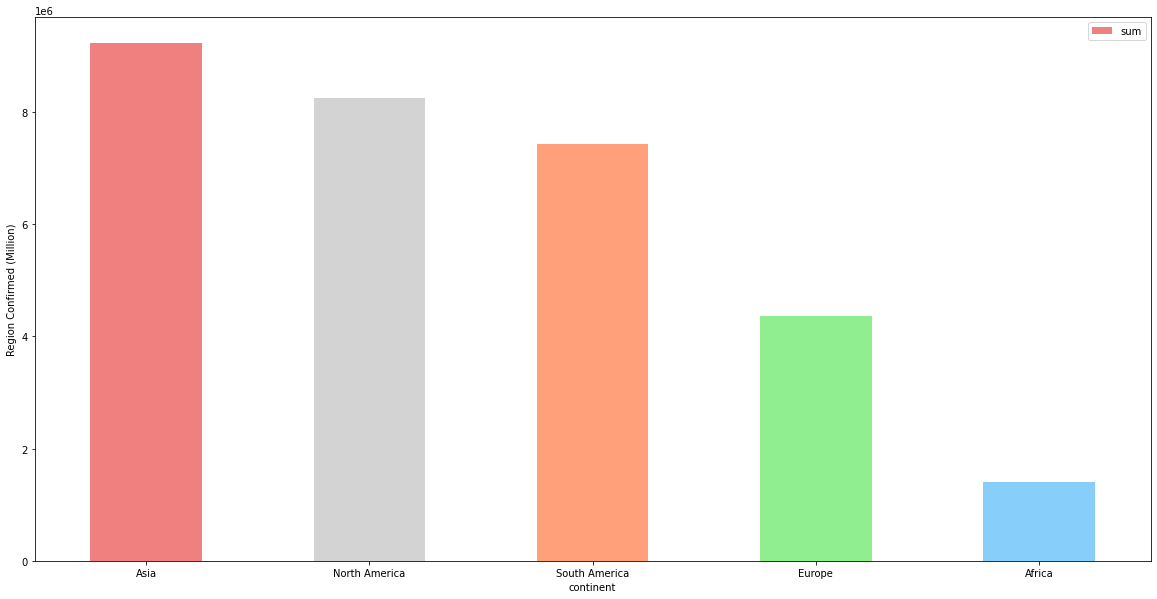

In [ ]:
region_confirmed.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Region Confirmed (Million)')
plt.show()

## **2. ประเทศที่มีจำนวนผู้ติดเชื้อมากที่สุดและน้อยที่สุด**

**ประเทศที่มีผู้ติดเชื้อมากที่สุด**

In [ ]:
counties_cases = worldOMeter.groupby('country').cases.agg(['sum'])

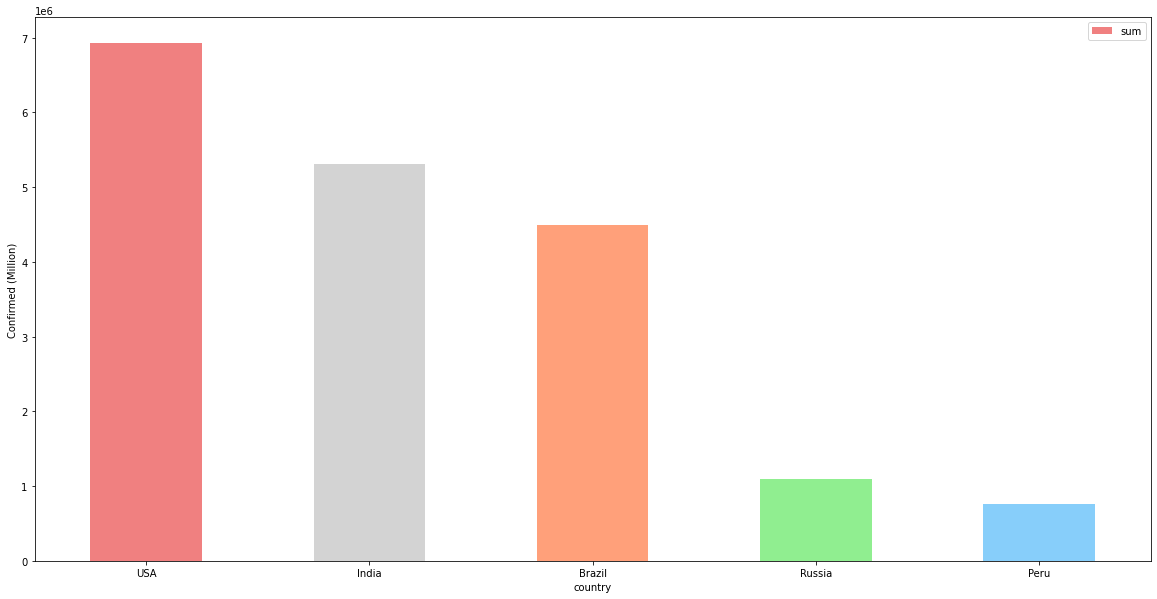

In [ ]:
counties_cases.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Confirmed (Million)')
plt.show()

**ประเทศที่มีผู้ติดเชื้อน้อยที่สุด**

In [ ]:
counties_cases.sort_values(by='sum', ascending=True).head()

,sum
country,
Anguilla,3
MS Zaandam,9
Western Sahara,10
Saint Pierre Miquelon,11
Holy See (Vatican City State),12


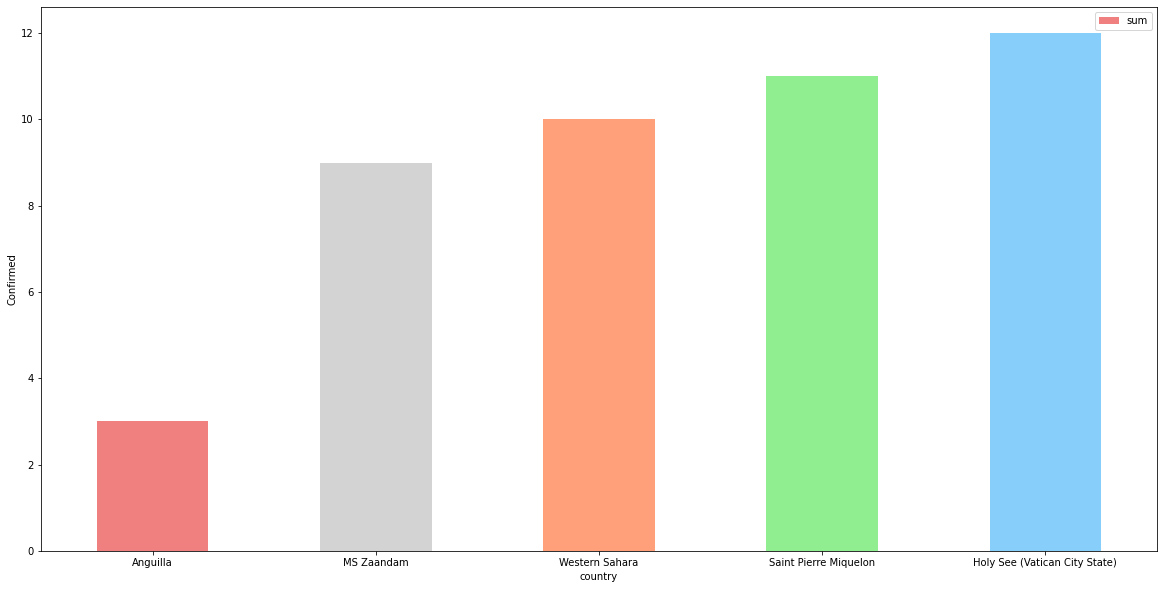

In [ ]:
counties_cases.sort_values(by='sum', ascending=True).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Confirmed')
plt.show()

**ประเทศที่มีจำนวนผู้เสียชีวิตมากที่สุด**

In [ ]:
counties_death = worldOMeter.groupby('country').deaths.agg(['sum'])
# counties_death.sort_values(by='sum', ascending=False).head()

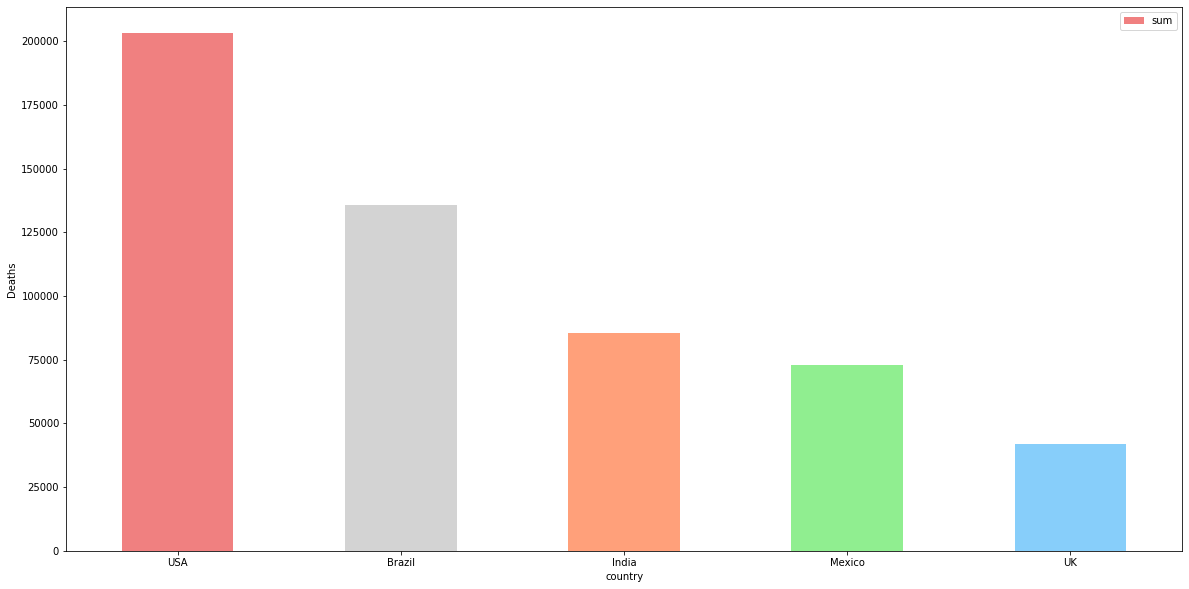

In [ ]:
counties_death.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Deaths')
plt.show()

**ประเทศที่มีจำนวนผู้เสียชีวิตน้อยที่สุด**

In [ ]:
counties_death[counties_death['sum'] > 0].sort_values(by='sum', ascending=True).head()

,sum
country,
Liechtenstein,1
Curaçao,1
Monaco,1
Cayman Islands,1
Western Sahara,1


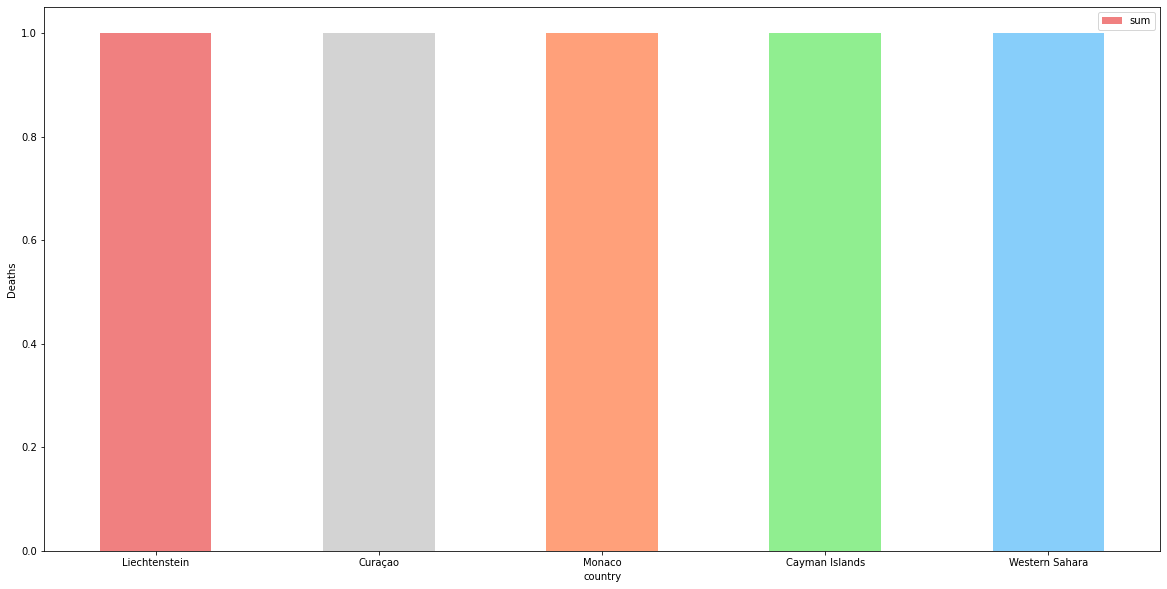

In [ ]:
counties_death[counties_death['sum'] > 0].sort_values(by='sum', ascending=True).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Deaths')
plt.show()

## **3. ประเทศที่มีอัตราผู้ที่รักษาหายต่อจำนวนผู้ป่วย, อัตราผู้ที่เสียชีวิตต่อจำนวนผู้ป่วย โดยค่าเฉลี่ยมากที่สุด**

In [ ]:
# สร้าง column rate = recovered / cases 
worldOMeter['recovered_rate'] = worldOMeter['recovered'] / worldOMeter['cases'] 
# worldOMeter.head()

**ประเทศที่มีอัตราผู้ที่รักษาหายต่อจำนวนผู้ป่วยมากที่สุด**

In [ ]:
counties_recovered_rate = worldOMeter.groupby('country').recovered_rate.agg(['sum'])

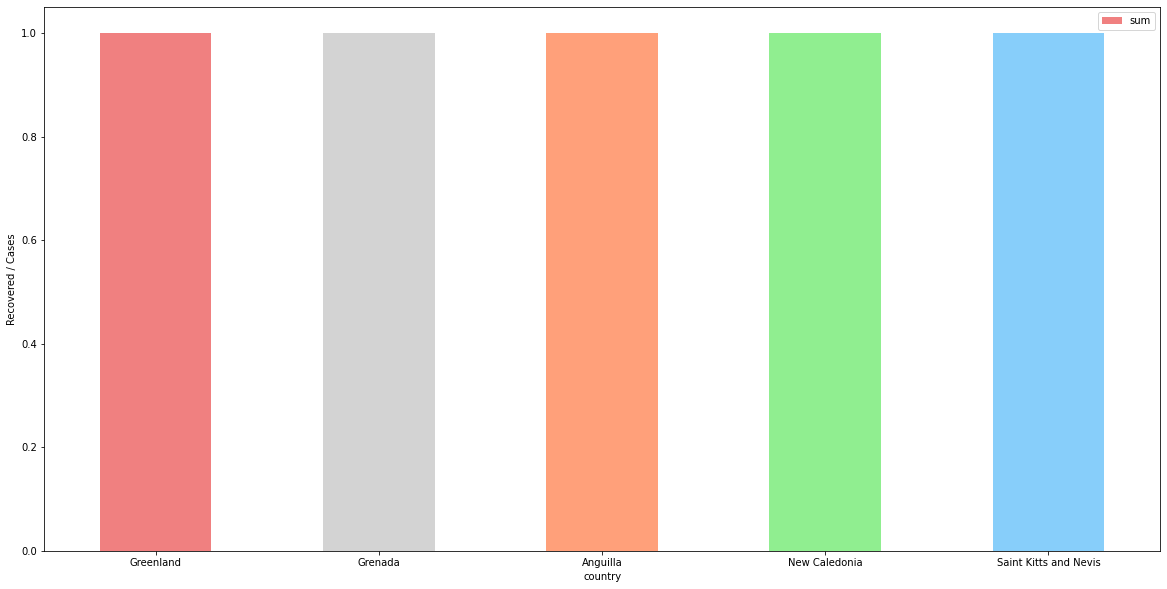

In [ ]:
counties_recovered_rate.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Recovered / Cases')
plt.show()

**ประเทศอัตราผู้ที่รักษาหายต่อจำนวนผู้ป่วยน้อยที่สุด**

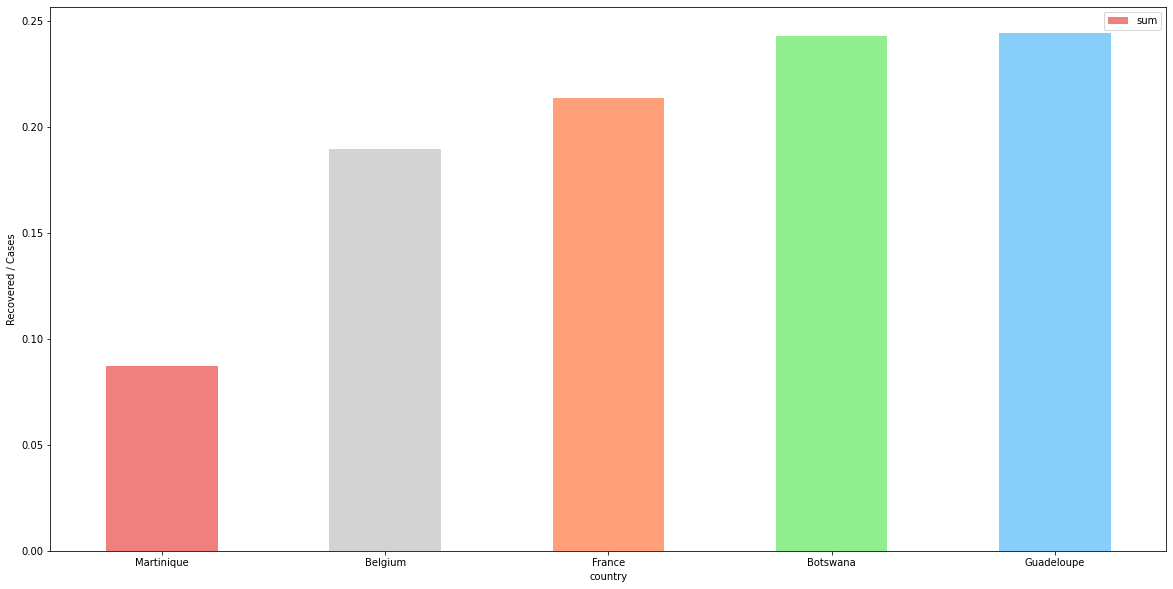

In [ ]:
counties_recovered_rate[counties_recovered_rate['sum']>0].sort_values(by='sum', ascending=True).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Recovered / Cases')
plt.show()

## **4. ในประเทศอเมริกา ในรัฐใดมีจำนวนผู้ติดเชื้อและจำนวนผู้เสียชีวิตมากที่สุดและน้อยที่สุด**

**รัฐที่มีจำนวนผู้ติดเชื้อมากที่สุด**

In [ ]:
usa_counties_cases = usa_counties.groupby('state').cases.agg(['sum'])

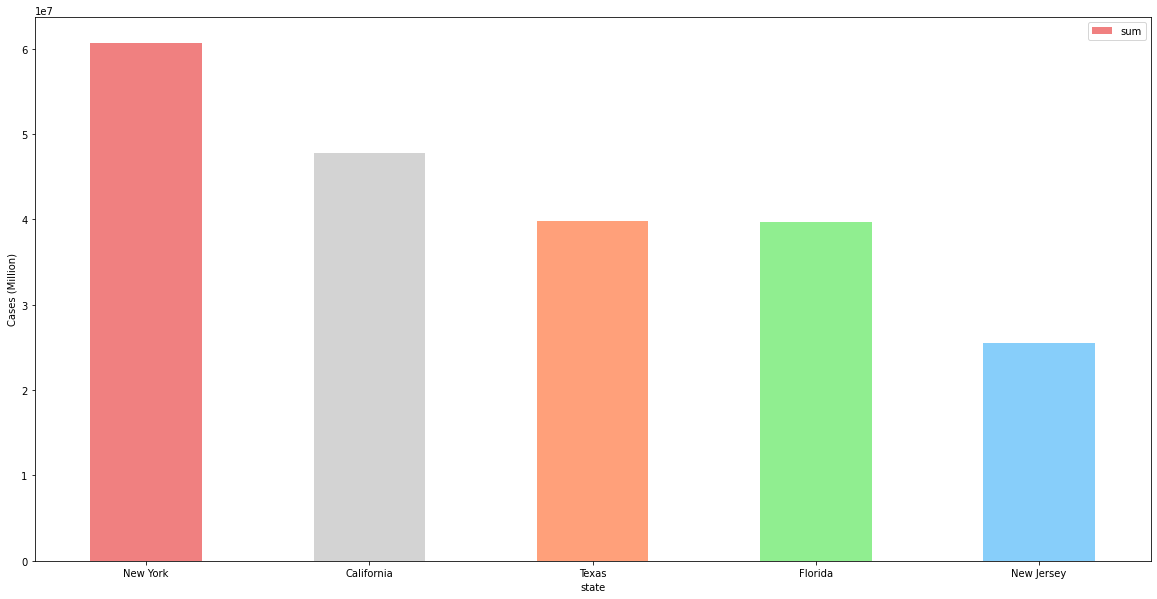

In [ ]:
usa_counties_cases.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Cases (Million)')
plt.show()

**รัฐที่มีจำนวนผู้ติดเชื้อน้อยที่สุด**

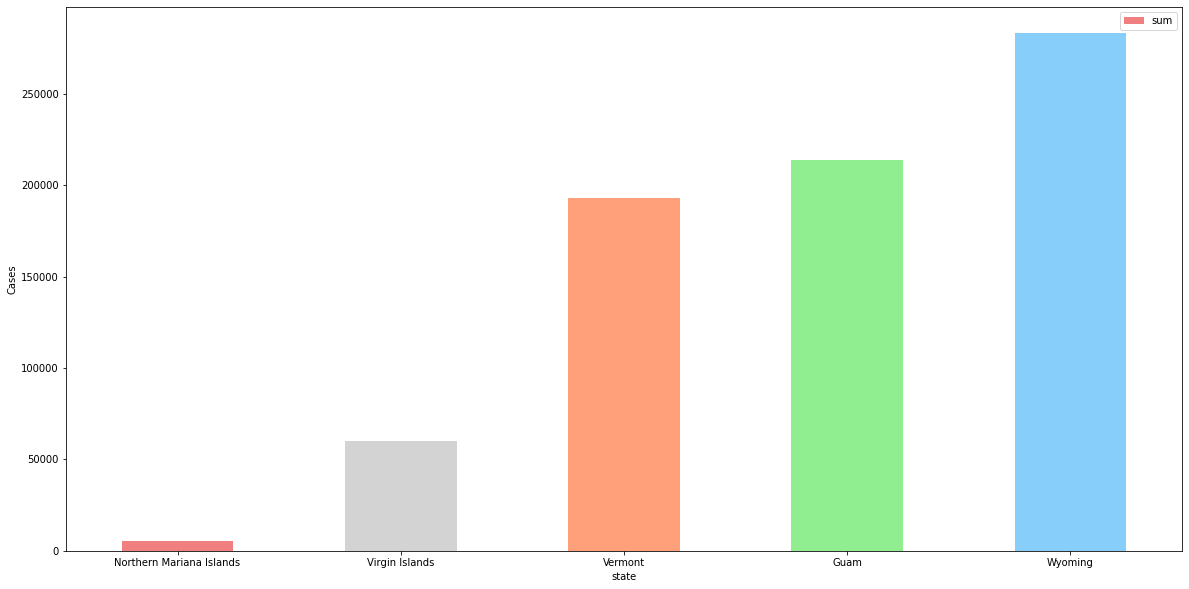

In [ ]:
usa_counties_cases.sort_values(by='sum', ascending=True).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Cases')
plt.show()

**รัฐที่มีจำนวนผู้เสียชีวิตมากที่สุด**

In [ ]:
usa_counties_deaths = usa_counties.groupby('state').deaths.agg(['sum'])

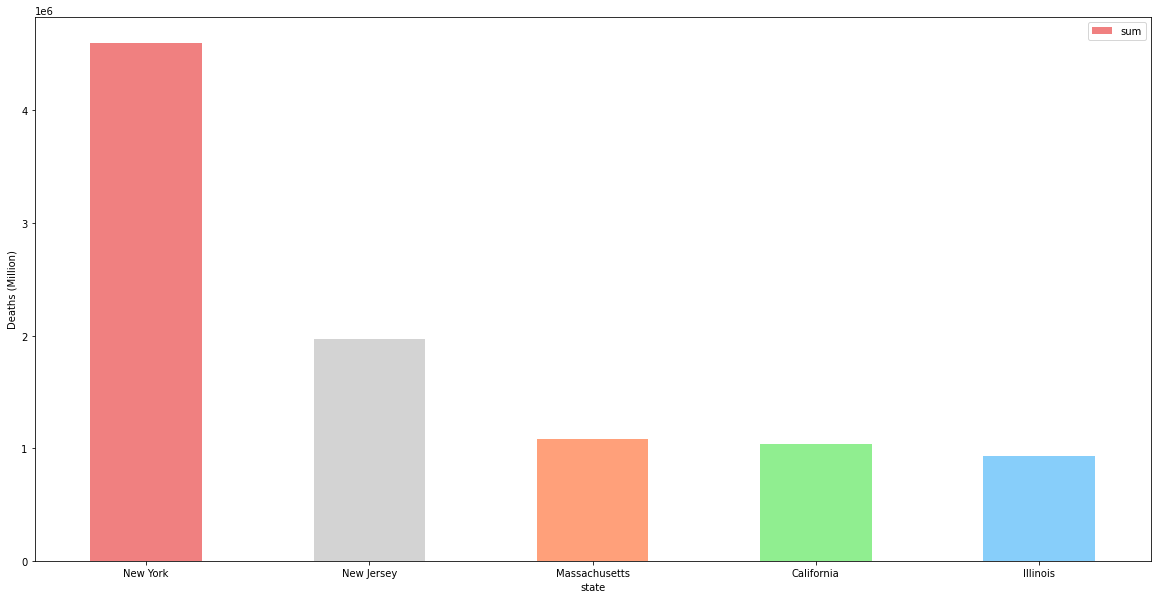

In [ ]:
usa_counties_deaths.sort_values(by='sum', ascending=False).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Deaths (Million)')
plt.show()

**รัฐที่มีจำนวนผู้เสียชีวิตน้อยที่สุด**

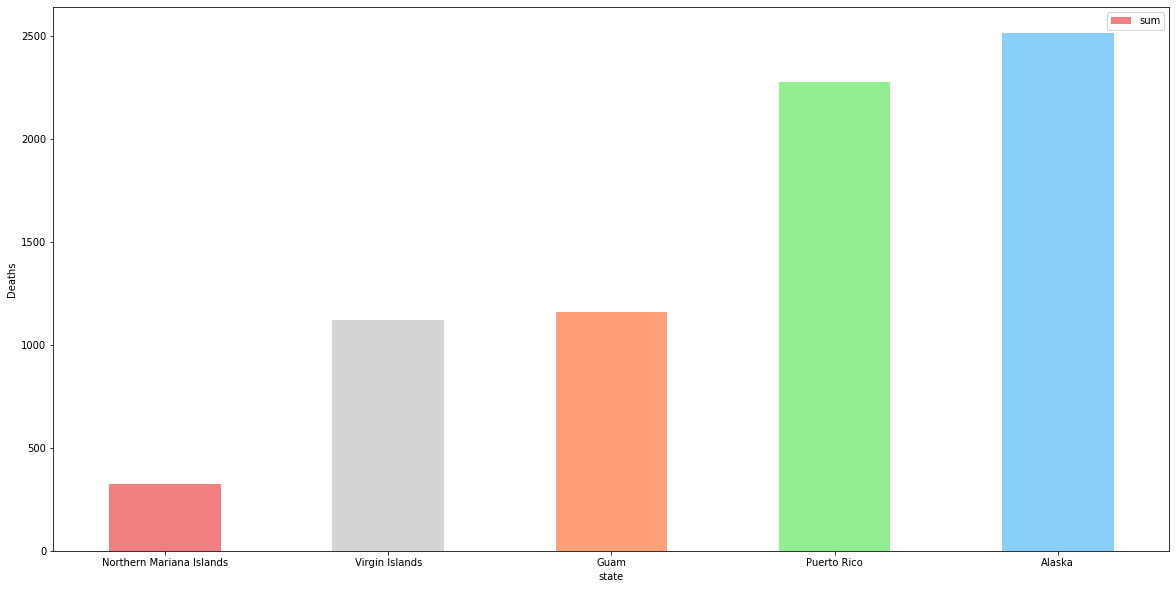

In [ ]:
usa_counties_deaths.sort_values(by='sum', ascending=True).head().plot.bar(y='sum', rot=0, color=color_set, figsize=(20,10))
plt.ylabel('Deaths')
plt.show()

# ${\color{green} {Modeling:}} $

In [ ]:
usa_states_daily.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'death

* เราจะทำโมเดลแบบง่าย ๆ กันนะครับ (ฮ่า ๆ)
* ทำการทำนายจำนวนผู้เสียชีวิต จากจำนวนผู้ติดเชื้อ ด้วย Linear Regression Model
* ข้อมูลจากตาราง usa_counties

## ${\color{lightgreen} {Feature \  Engineering:}} $

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# check column
usa_counties.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
# ทำการ groupby date, sum death, cases ในแต่ละวัน
df = usa_counties.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'})
df.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff54c41c1d0>,
      dtype=object)

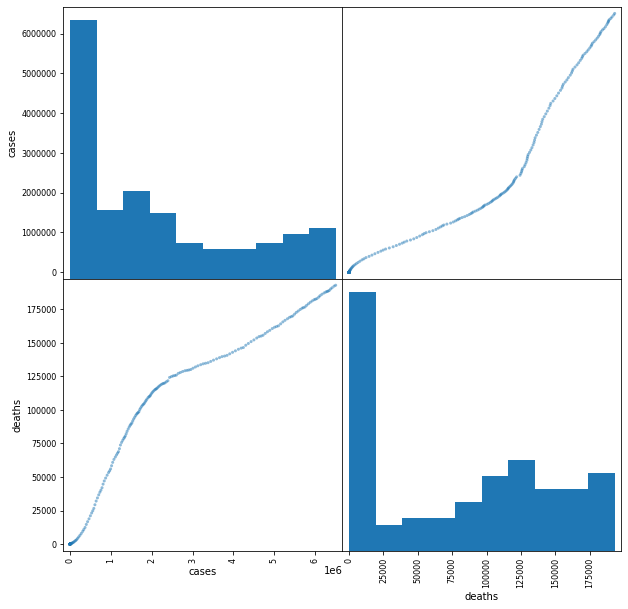

In [ ]:
pd.plotting.scatter_matrix(df[['cases', 'deaths']], figsize=(10,10))

In [ ]:
#sns.heatmap(df.corr(), cmap = 'YlGnBu')
df.corr()

,cases,deaths
cases,1.000000,0.954817
deaths,0.954817,1.000000


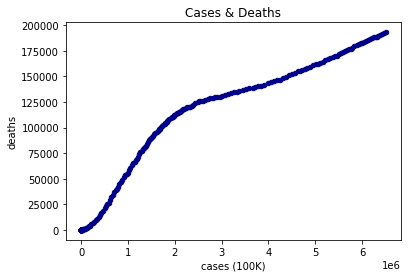

In [ ]:
df.plot.scatter(x='cases', y='deaths', c='DarkBlue')
plt.title('Cases & Deaths')
plt.xlabel('cases (100K)')
plt.ylabel('deaths')
plt.show()

In [ ]:
df.describe()

,cases,deaths
count,2.360000e+02,236.000000
mean,2.056896e+06,80564.114407
std,2.082435e+06,67612.372775
min,1.000000e+00,0.000000
25%,1.660725e+04,260.750000
50%,1.504748e+06,89864.500000
75%,3.532964e+06,137395.250000
max,6.504676e+06,193016.000000


## ${\color{lightgreen} {Machine \ Learning \ Pipeline:}} $

In [ ]:
# make model
x = df.cases.values.reshape(-1,1)
y = df.deaths.values.reshape(-1,1)

# train set 80% & test set 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# make model
model = LinearRegression()

# train model
model.fit(x_train, y_train)

# test model
y_pred = model.predict(x_test)

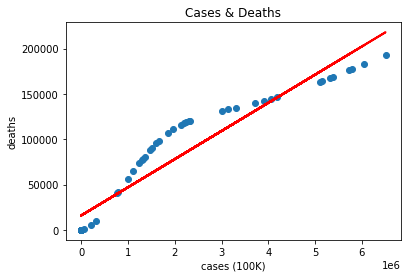

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title('Cases & Deaths')
plt.xlabel('cases (100K)')
plt.ylabel('deaths')
plt.show()

## ${\color{lightgreen} {Model \ Selection:}} $

In [ ]:
print('Score = ', metrics.r2_score(y_test, y_pred))

Score =  0.8962750882160099


In [ ]:
# compare between test data and predicted data
df_show = pd.DataFrame({'actually_data':y_test.flatten(), 'predicted_data':y_pred.flatten()})
df_show.head()

,actually_data,predicted_data
0,134810,119021.560920
1,119825,87207.443338
2,73847,54307.980009
3,80634,58003.151500
4,98061,67824.857855


# ${\color{red} {Story \ \  Telling:}} $

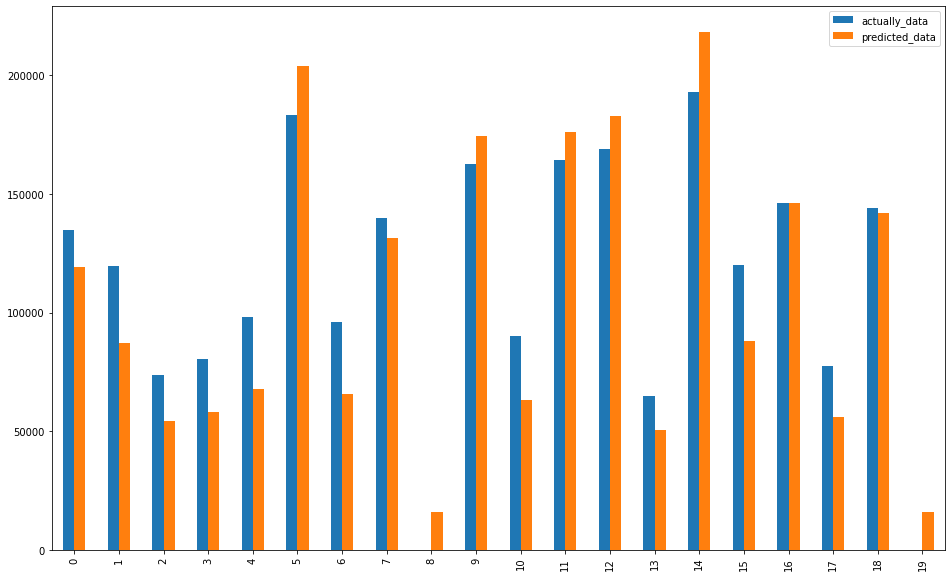

In [ ]:
df1 = df_show.head(20)
df1.plot(kind='bar', figsize=(16, 10))
plt.show()

## **Map**

In [ ]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(worldOMeter)):
    folium.Circle(
        location=[worldOMeter.iloc[i]['lat'], worldOMeter.iloc[i]['long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+worldOMeter['country'][i]+"</h5>"+
                    #"<div style='text-align:center;'>"+str(np.nan_to_num(worldOMeter.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(worldOMeter['cases'][i])+"</li>"+
        "<li>Deaths:   "+str(worldOMeter['deaths'][i])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(worldOMeter['deaths'][i]/(worldOMeter['cases'][i]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(worldOMeter.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map